# Report

**Report goal**  
This notebook summarizes the project’s key outputs for air quality in six Italian cities using OpenAQ-derived measurements.  
Figures and tables are loaded from disk (pipeline outputs) so that the narrative remains **lightweight** and **reproducible**.

> Interpretation note: these are **threshold-based indicators** computed by this project. They are not necessarily legal compliance determinations, because official rules involve specific quality metrics.

**How to read this report**
1. **City-level data quality** → where the evidence is stronger/weaker  
2. **Dispersion** → how variable daily pollution is across cities  
3. **Compliance-style summary** → values compared with current EU standards and 2030 targets
4. **Annual trends** → visualiziation of annual means 
5. **Daily exceedance indicators (2030)** → visualization of how often daily thresholds are exceeded

**Key takeaways (from the figures included here)**
- **NO₂**: Torino, Milano, Napoli, Roma sit well above the 2030 annual guide (dashed line) across most available years; Firenze is closer and drops markedly in 2025.  
- **PM₁₀ / PM₂.₅**: available years show levels systematically above the 2030 annual guides in Torino, Milano, Napoli, and Firenze; exceedance-day counts remain substantial where coverage exists.  
- **O₃**: exceedance days are particularly high in Torino (notably 2022) and in Milano in 2024–2025, suggesting strong summer-season exposure episodes.


In [12]:
import pandas as pd
from IPython.display import display, Image

## Preliminary

**What this section is for**  
This section fixes the scope of the analysis (cities, years, pollutants) and the provenance of figures/tables.

Recommended to include (one short paragraph):
- the effective time window covered by the data (some panels have missing years)  
- pollutants included (NO₂, O₃, PM₁₀, PM₂.₅) and the metric used in each plot  
- where the pipeline writes outputs (e.g., `results/plots/...`, `results/compliance_table.csv`)

**Note on missing panels**
In the plots below, some city–pollutant combinations are missing for some years (or entirely). This is typically due to sensor availability/coverage in OpenAQ and should be interpreted alongside the quality flags.


### City-level data quality

**What this shows**  
A city × year × pollutant quality table (flags **High/Medium/Low**) based on sensor availability and temporal coverage. The **flagging rules** used were: <br>

**High**    -->     >= 80 days avaiable     --AND--     >= 3 median active sensors per day <br>
**Medium**  -->     >= 60 days avaiable     --OR---     >= 2 median active sensors per day <br>
**Low**     -->      < 60 days avaiable     --AND--      < 2 median active sensors per day <br>

**What the table indicates in this run**
- There are **no “Low”** entries: only **High** and **Medium**.
- **NO₂** coverage is strongest overall (**21 High / 3 Medium** city-years).
- **O₃** is the most coverage-sensitive pollutant (**10 High / 14 Medium**), frequently supported by a small number of sensors (often 1–2).
- **PM₁₀** is mixed (**6 High / 6 Medium**) and available for fewer city-years than NO₂/O₃.
- **PM₂.₅** is the most limited among particles (**4 High / 8 Medium**), with several city-years supported by ~1 sensor.

**How to use it**
- Treat **Medium** years as informative but cautious: emphasize broad patterns over small year-to-year differences.
- When a pollutant is mostly **Medium** (notably O₃ and PM₂.₅ here), avoid over-confident city rankings; prefer “available evidence suggests…”.


In [13]:
pd.read_csv("../results/quality_checks/cities_quality.csv")

,city,year,parameter,year_median_active_sensors_per_city_parameter,percent_days_avaiable_per_city_year,flag_city_parameter
0,Firenze,2021,no2 µg/m³,4.0,76.99,Medium
1,Firenze,2021,o3 µg/m³,1.0,74.25,Medium
2,Firenze,2022,no2 µg/m³,4.0,89.32,High
3,Firenze,2022,o3 µg/m³,1.0,81.92,Medium
4,Firenze,2023,no2 µg/m³,4.0,79.18,Medium
...,...,...,...,...,...,...
67,Torino,2024,pm25 µg/m³,1.0,32.33,Low
68,Torino,2025,no2 µg/m³,6.0,50.96,Medium
69,Torino,2025,o3 µg/m³,3.0,50.68,Medium
70,Torino,2025,pm10 µg/m³,1.0,34.52,Low


### Daily measures dispersion

**What this shows**  
Boxplots of **daily mean** values by city for each pollutant, highlighting variability, tails, and outliers.

**Commentary (based on the displayed boxplots)**
- **NO₂**: Napoli shows the highest typical levels (median), followed by Milano/Torino/Palermo; Firenze is clearly lower. All cities show a long upper tail, suggesting episodic peaks.  
- **O₃**: Palermo has the highest median and a comparatively tight IQR; Milano shows very wide dispersion, consistent with strong episodic variability.  
- **PM₁₀**: Napoli has the highest central tendency; Milano exhibits the heaviest upper tail/outliers (many high episodes).  
- **PM₂.₅**: medians are broadly similar across Torino/Milano/Firenze/Napoli, but Milano and Napoli show heavier upper tails (more extreme days).

**Why it matters**
These differences in dispersion help explain exceedance-day counts: cities with heavier tails tend to have more days above daily thresholds even if annual means are similar.

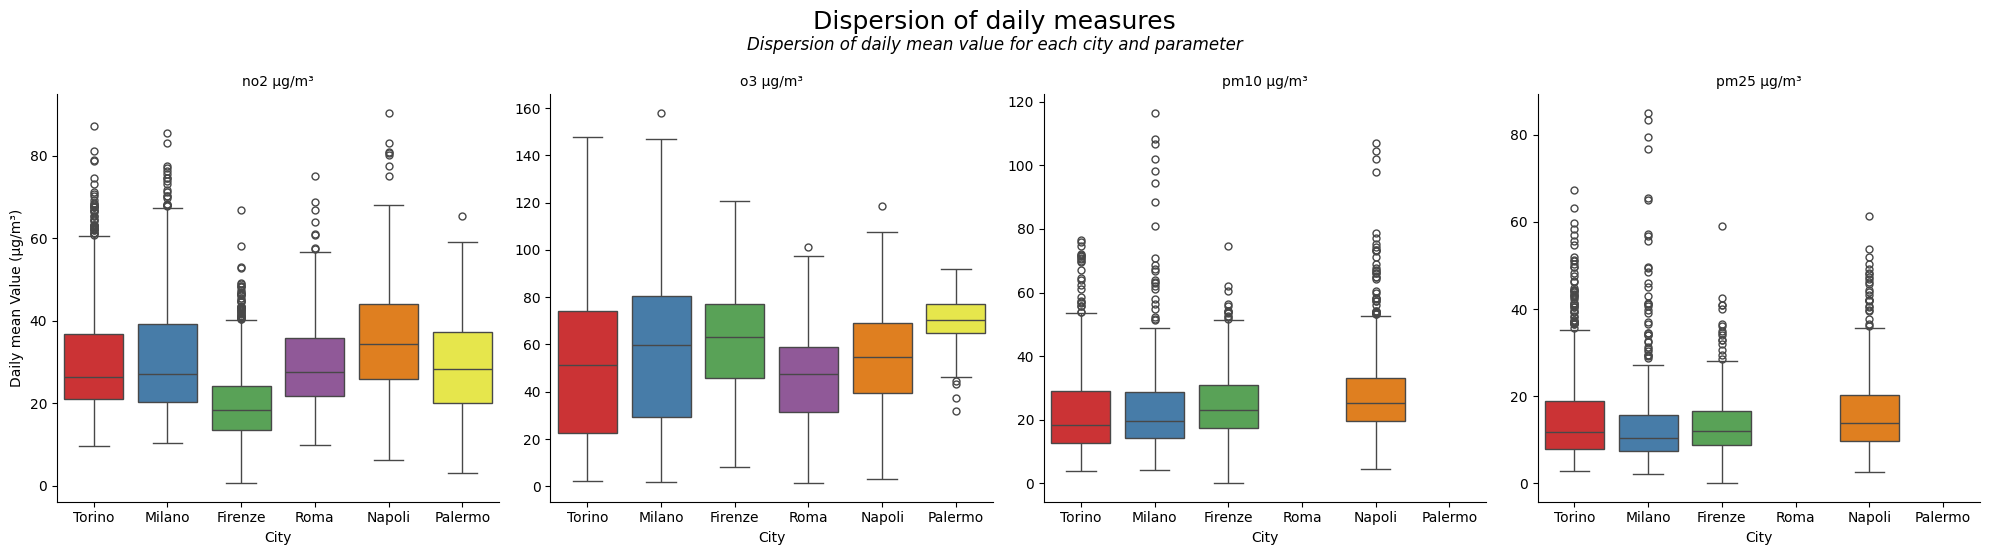

In [14]:
display(Image(filename="../results/plots/main/daily_averages_boxplot.png", width=1200))

## Compliance

**What this shows**  
A policy-oriented summary table (city × pollutant × year) that combines:
- **annual averages** vs current/2030 limits (where defined in the project),  
- **days above a daily threshold** (where applicable), and  
- the merged **data-quality flag** for that city-year.

**What the table indicates in this run**
- **NO₂ (annual means):** **22/24** available city-years are **above the 2030 annual guide** (20 µg/m³). Only **2** cases fall at/below the guide (both in **Firenze**, in 2021 and 2025).  
- **PM₁₀ (annual means):** **12/12** available city-years are above the 2030 annual guide (20 µg/m³).  
- **PM₂.₅ (annual means):** **12/12** available city-years are above the 2030 annual guide (10 µg/m³).  
- **Daily exceedance-style indicators (2030 days limits):**
  - NO₂: **10/24** city-years exceed the 2030 days limit; **14/24** are within it.  
  - PM₁₀: **9/12** exceed; **3/12** within.  
  - PM₂.₅: **11/12** exceed; **1/12** within.  
- **O₃ (days):** exceedance counts are **available for 10/24** city-years; the remainder are marked *Not Applicable* in the table, so treat O₃ comparisons as partial evidence unless that logic is clarified/adjusted.

**How to read it responsibly**
- Prioritize **High** quality rows; avoid over-interpreting sparse city-years.
- Use the table to connect annual means with exceedance days: cities with heavier daily tails typically show higher exceedance frequency.


In [15]:
pd.read_csv("../results/compliance_table.csv")

,City,Parameter,Year,Yearly Average (µg/m³),Current yearly limit (µg/m³),2030 yearly limit (µg/m³),Compliance (Yearly Average),Percent Above Current Standards,Percent Above 2030 Standards,Daily limit value (µg/m³),Days above limit value,Current days limit,2030 days limit,Compliance (Days),Flag,Median active sensors,Percent days avaiable
0,Firenze,no2 µg/m³,2021,18.96,40,20,Good (Below current limit and also below 2030 ...,Below current standards,Below 2030 standards,50,2,Not regualted,18,Good (Below 2030 limit),Medium,4.0,76.99
1,Firenze,no2 µg/m³,2022,20.91,40,20,Problematic (Below current limit but above 203...,Below current standards,4.549330847079824% above 2030 standards,50,1,Not regualted,18,Good (Below 2030 limit),High,4.0,89.32
2,Firenze,no2 µg/m³,2023,21.33,40,20,Problematic (Below current limit but above 203...,Below current standards,6.652291191660953% above 2030 standards,50,1,Not regualted,18,Good (Below 2030 limit),Medium,4.0,79.18
3,Firenze,no2 µg/m³,2024,22.49,40,20,Problematic (Below current limit but above 203...,Below current standards,12.453773080258678% above 2030 standards,50,0,Not regualted,18,Good (Below 2030 limit),Medium,5.0,40.27
4,Firenze,no2 µg/m³,2025,14.00,40,20,Good (Below current limit and also below 2030 ...,Below current standards,Below 2030 standards,50,0,Not regualted,18,Good (Below 2030 limit),Medium,4.0,44.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Napoli,pm25 µg/m³,2025,12.24,25,10,Problematic (Below current limit but above 203...,Below current standards,22.379805431546362% above 2030 standards,25,5,Not regualted,18,Good (Below 2030 limit),Medium,2.0,39.45
68,Torino,pm25 µg/m³,2022,17.67,25,10,Problematic (Below current limit but above 203...,Below current standards,76.73669641631959% above 2030 standards,25,57,Not regualted,18,Problematic (Above 2030 limit),Medium,1.0,64.66
69,Torino,pm25 µg/m³,2023,14.68,25,10,Problematic (Below current limit but above 203...,Below current standards,46.76096518724584% above 2030 standards,25,42,Not regualted,18,Problematic (Above 2030 limit),Medium,1.0,75.07
70,Torino,pm25 µg/m³,2024,17.46,25,10,Problematic (Below current limit but above 203...,Below current standards,74.59099451456332% above 2030 standards,25,29,Not regualted,18,Problematic (Above 2030 limit),Low,1.0,32.33


### Annual trends

**What this shows**  
Annual mean trends by city for NO₂, PM₁₀, and PM₂.₅ (dashed line = the project’s 2030 guide for that pollutant).

**Commentary**
- **NO₂**:  
  - Torino decreases from 2021→2023 but remains well above the dashed guide and rebounds slightly after 2023.  
  - Milano is the highest among the shown cities (notably 2021), still far above the dashed guide in 2024–2025.  
  - Roma shows a gradual decline (2021→2025) but remains above the dashed guide.  
  - Firenze sits near the dashed guide in 2022–2024 and drops clearly below it in 2025 (note the lighter quality flag there).  
- **PM₁₀**: all available city-years lie above the dashed guide. Milano is highest in 2024–2025; Torino peaks in 2024; Napoli remains consistently high.  
- **PM₂.₅**: all available city-years lie above the dashed guide (10 µg/m³). Milano is highest (2024–2025), while Firenze is closer but still above.

**Interpretation note**
Where only 1–2 years are available (or where quality is Medium/Low), describe results as “available evidence suggests…” rather than definitive long-term trends.

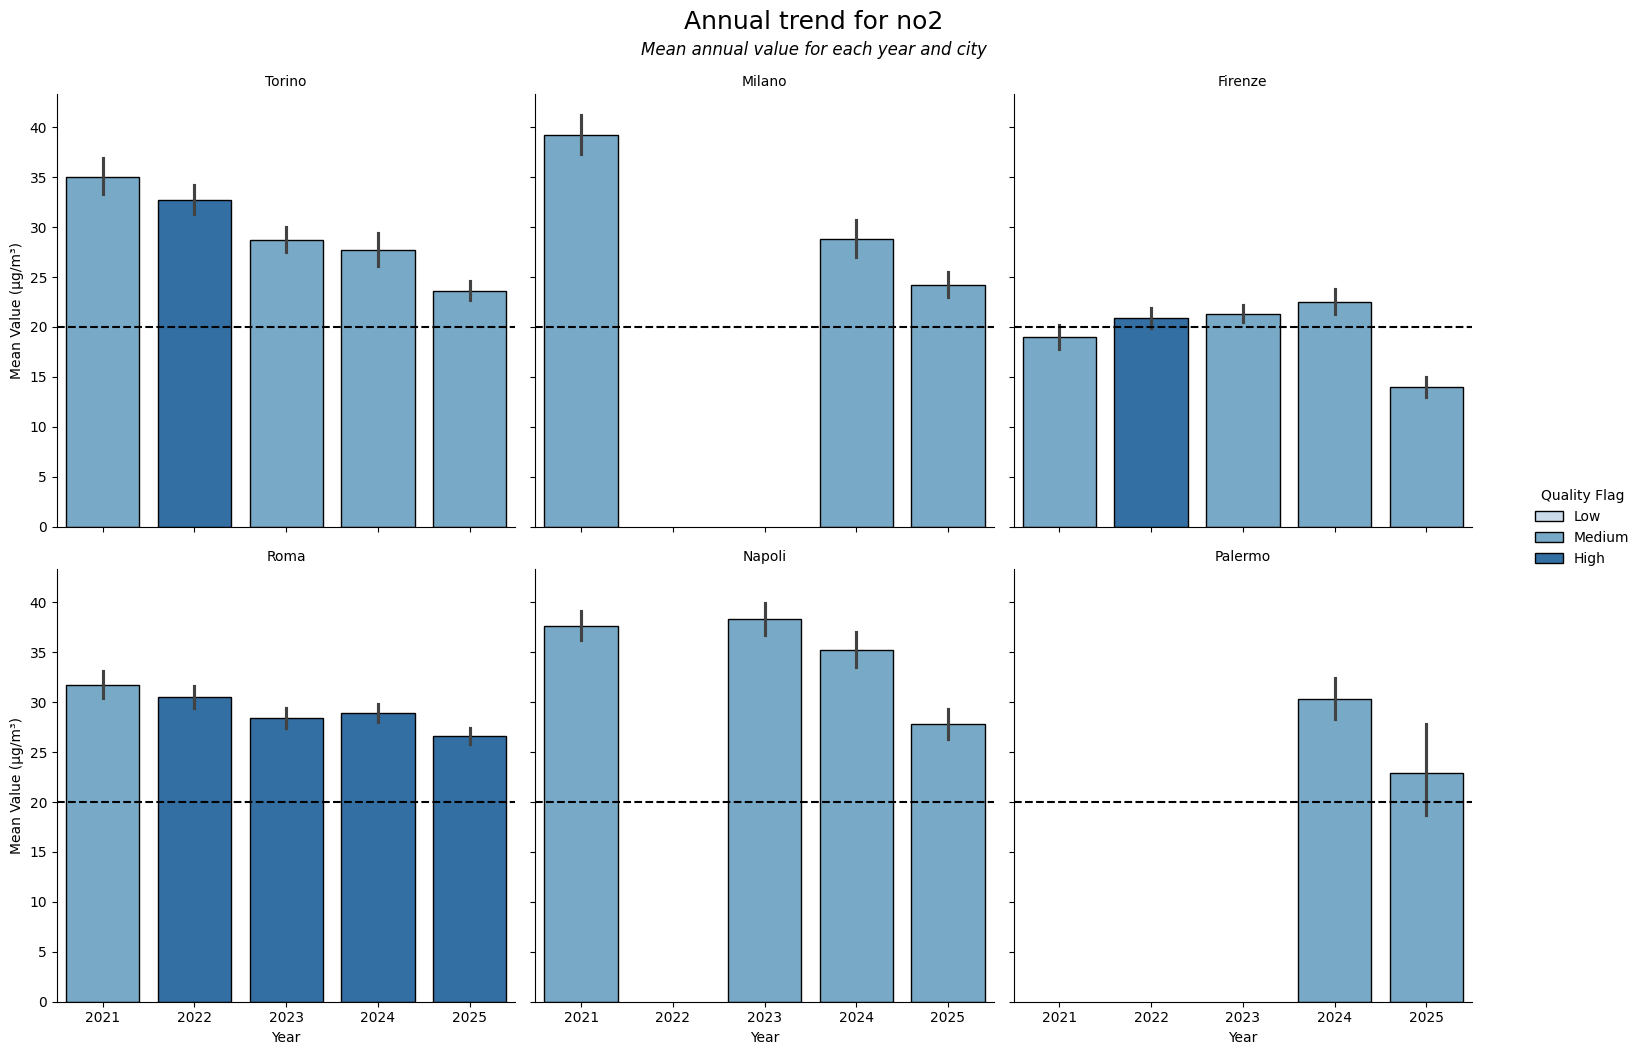

In [16]:
display(Image(filename="../results/plots/main/trends_annual_no2.png", width=800))

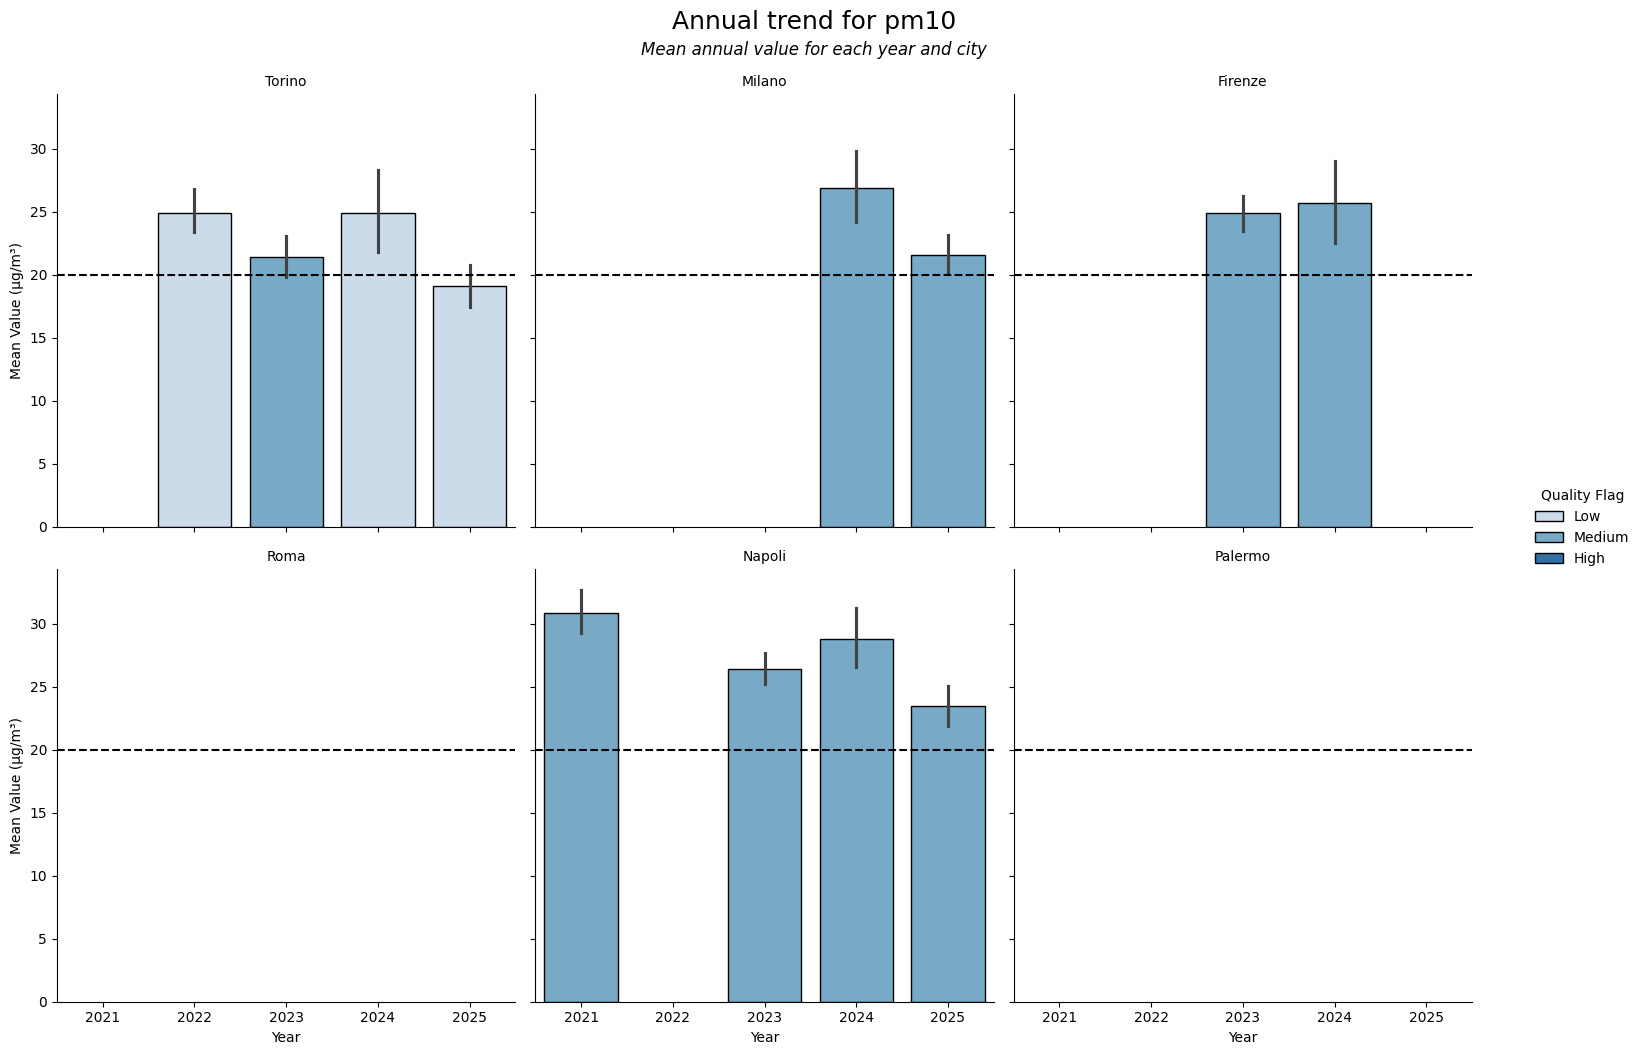

In [17]:
display(Image(filename="../results/plots/main/trends_annual_pm10.png", width=800))

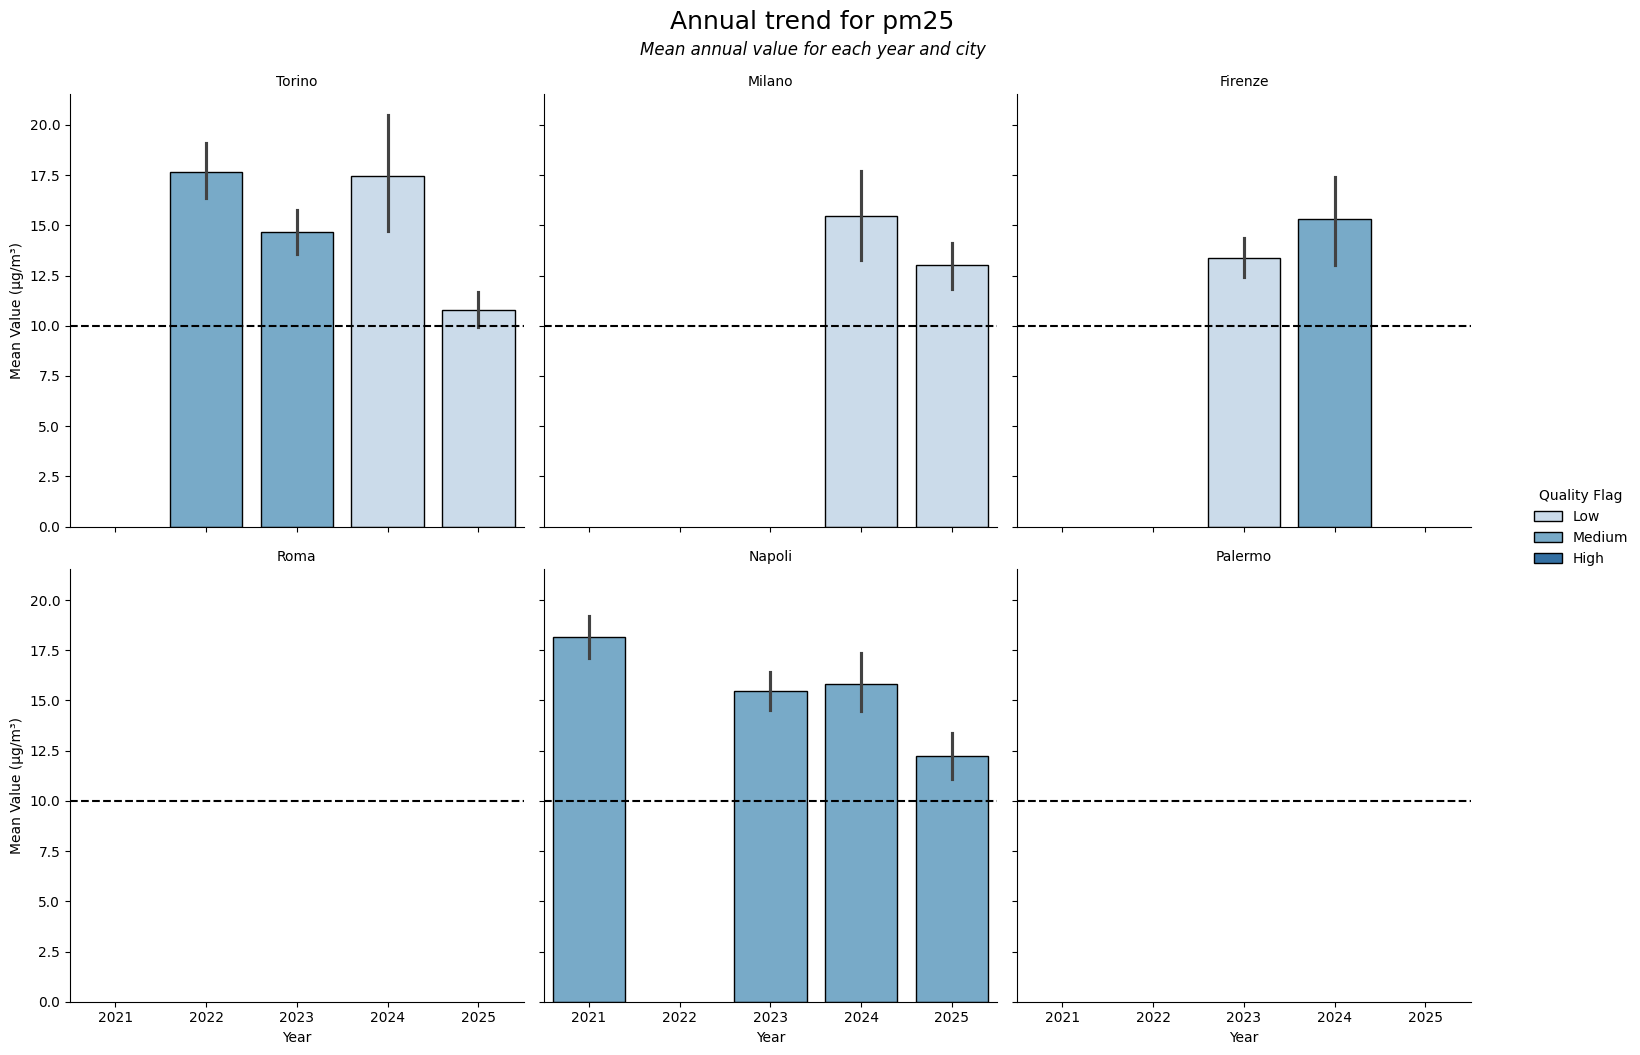

In [18]:
display(Image(filename="../results/plots/main/trends_annual_pm25.png", width=800))

## Daily values

**What this shows**  
Days above the project’s **EU 2030 daily threshold** (one figure per pollutant), by city and year. The dashed line marks the allowed number of exceedance days in this implementation.

**Commentary (based on the displayed figures)**
- **NO₂**: Milano, Napoli, and Torino show very high exceedance-day counts in 2021–2022 (tens to ~80 days), with improvements in later years but still frequent exceedances in Milano (2024–2025) and Torino (2024). Firenze is consistently low (single-digit days). Roma improves markedly by 2024, but remains above the dashed guide in earlier years.  
- **O₃**: Torino stands out (very high exceedances in 2022 and high again in 2025). Milano shows high exceedances in 2024–2025. Roma is near-zero across years.  
- **PM₁₀**: Milano (2024–2025) and Torino (notably 2024) show large exceedance-day counts; Napoli is persistently above the dashed guide. Firenze is closer to the threshold but still exceeds it in 2024.  
- **PM₂.₅**: exceedance days are substantial in Milano (especially 2025), Torino (2022–2025), and Napoli (2021, 2024–2025). Firenze exceeds the dashed guide in 2024 but not in 2023.

**How to use this section**
This is the most “actionable” view for a reader: it translates concentration levels into a frequency-of-bad-days story. Pair it with the quality flags to avoid over-interpreting low-coverage years.


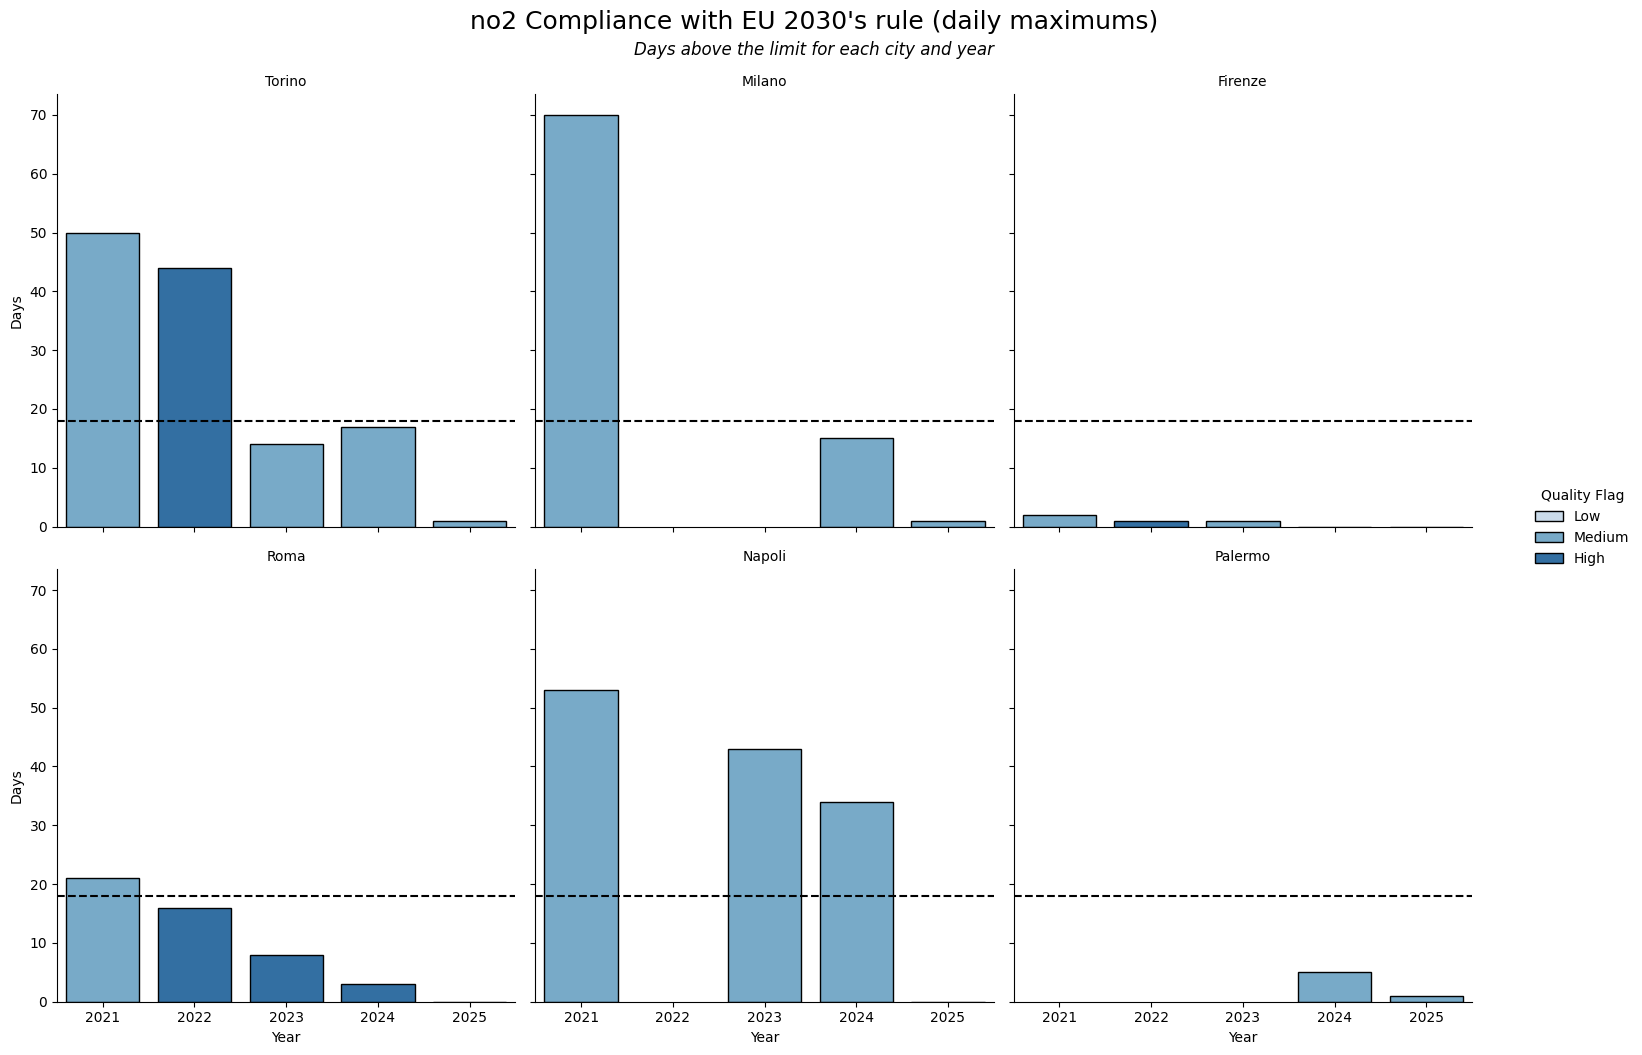

In [19]:
display(Image(filename="../results/plots/main/compliance_days_2030_no2.png", width=800))

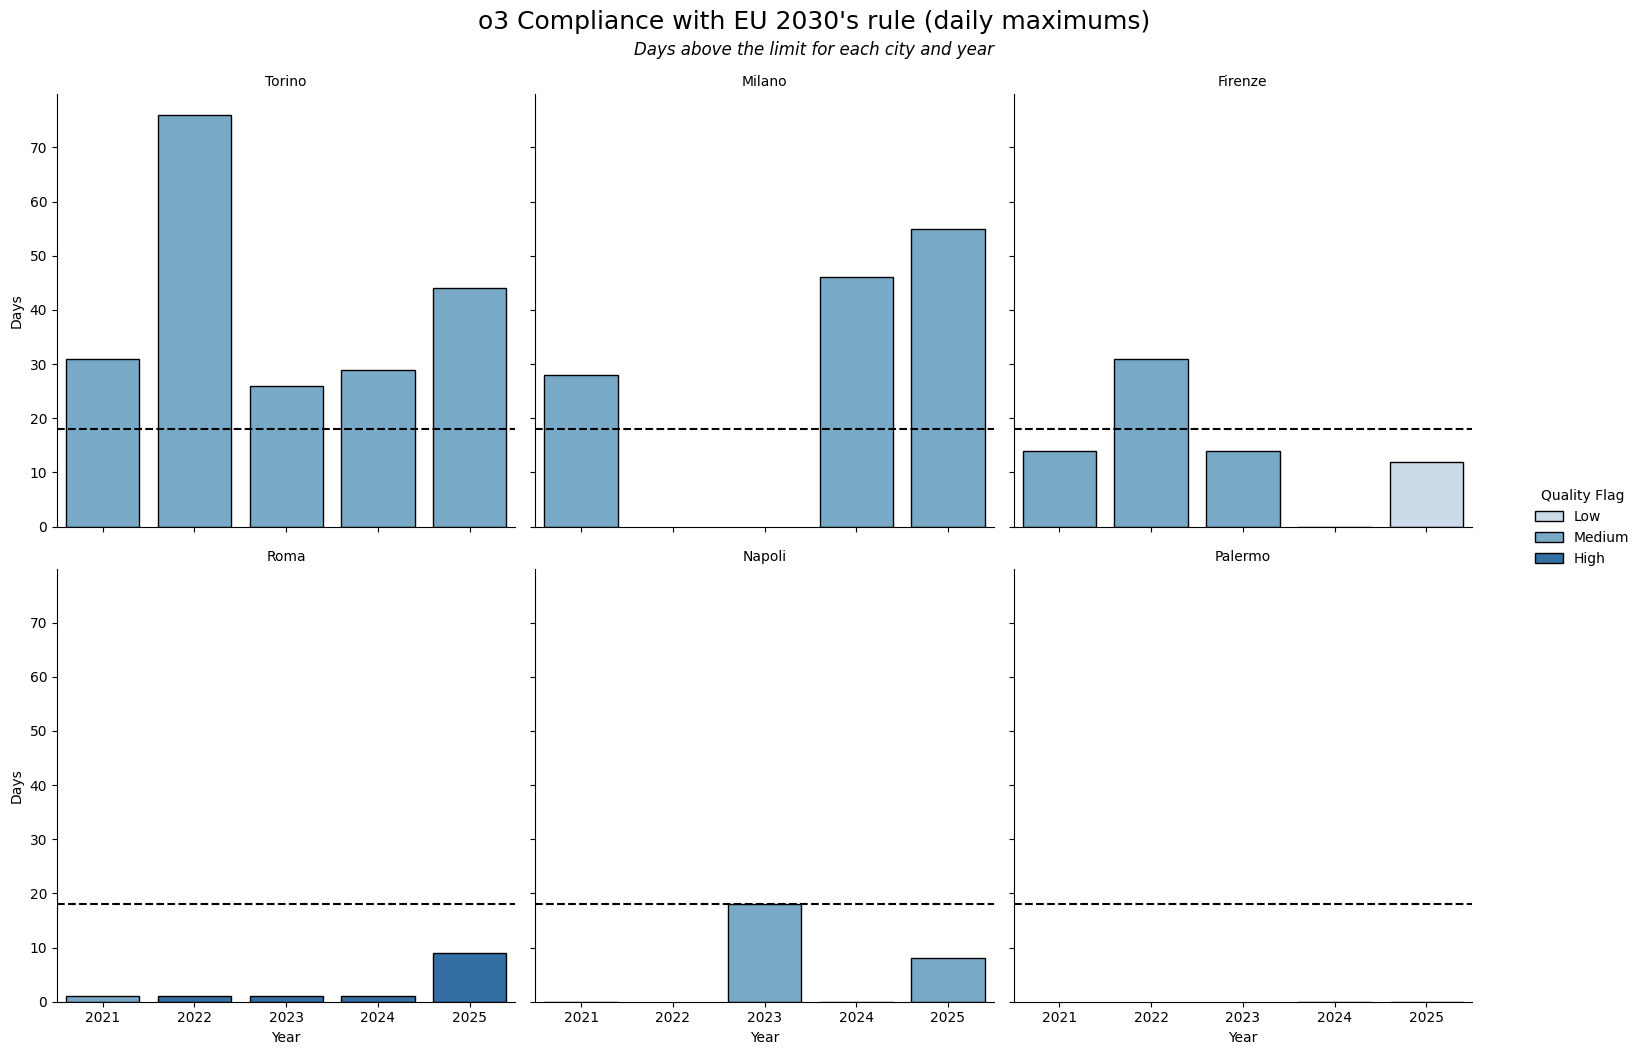

In [20]:
display(Image(filename="../results/plots/main/compliance_days_2030_o3.png", width=800))

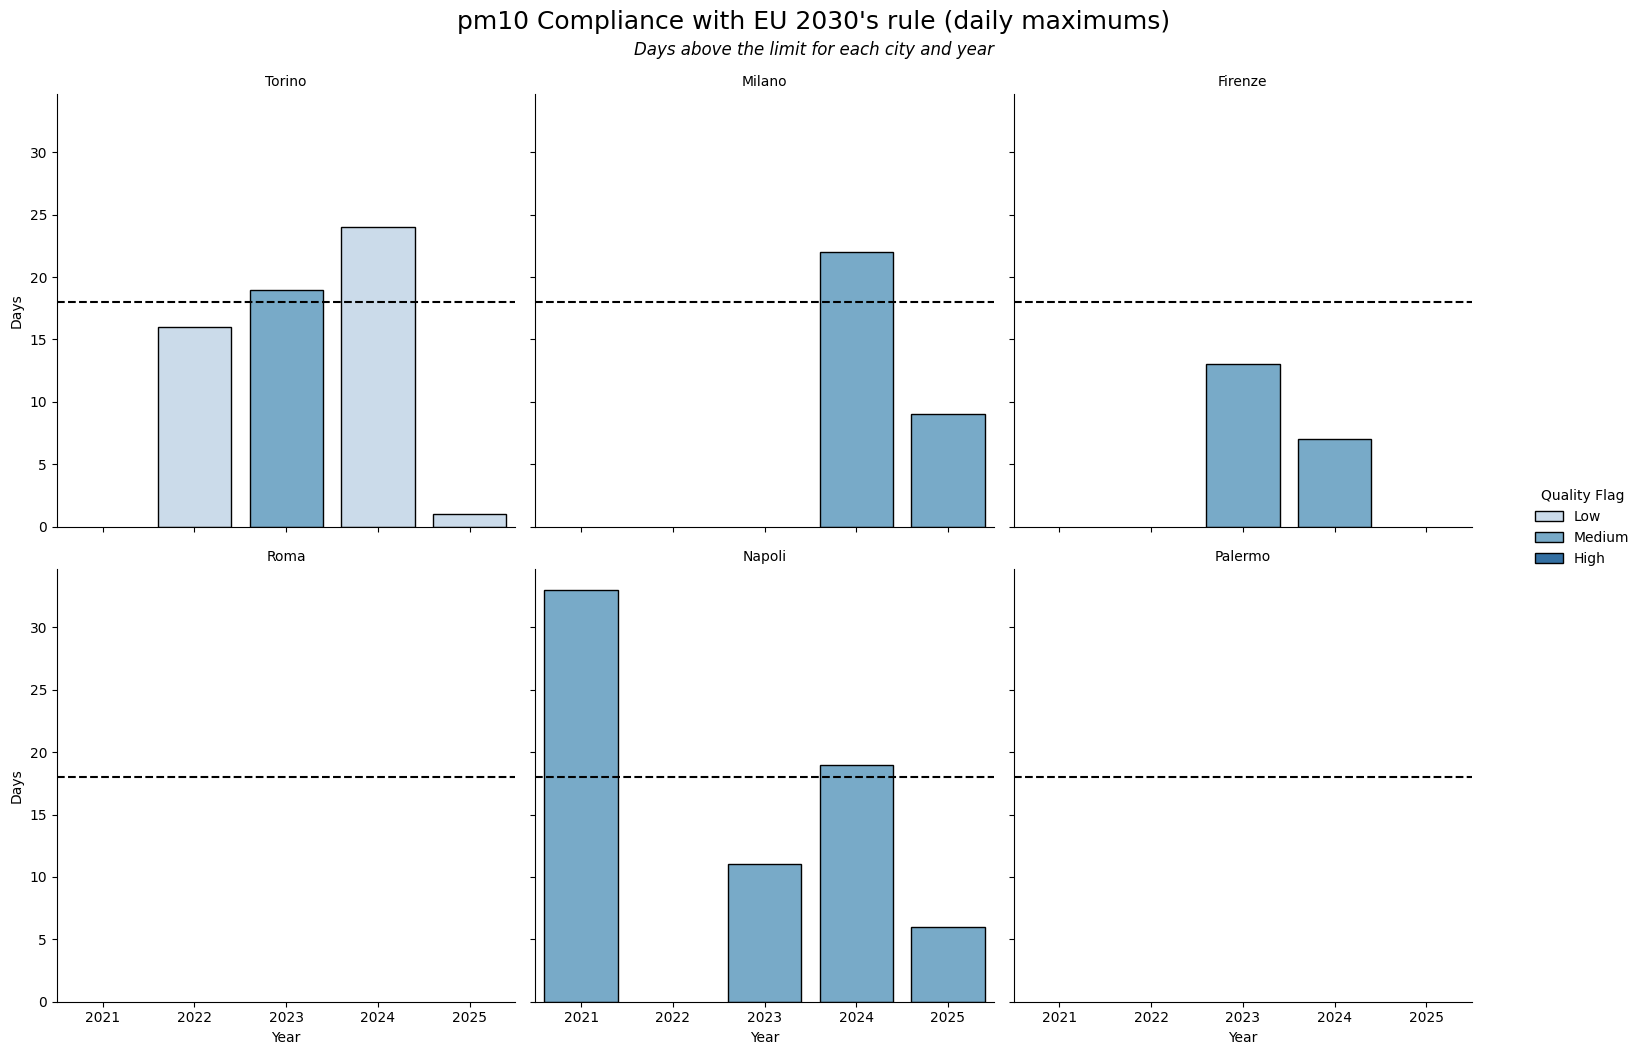

In [21]:
display(Image(filename="../results/plots/main/compliance_days_2030_pm10.png", width=800))

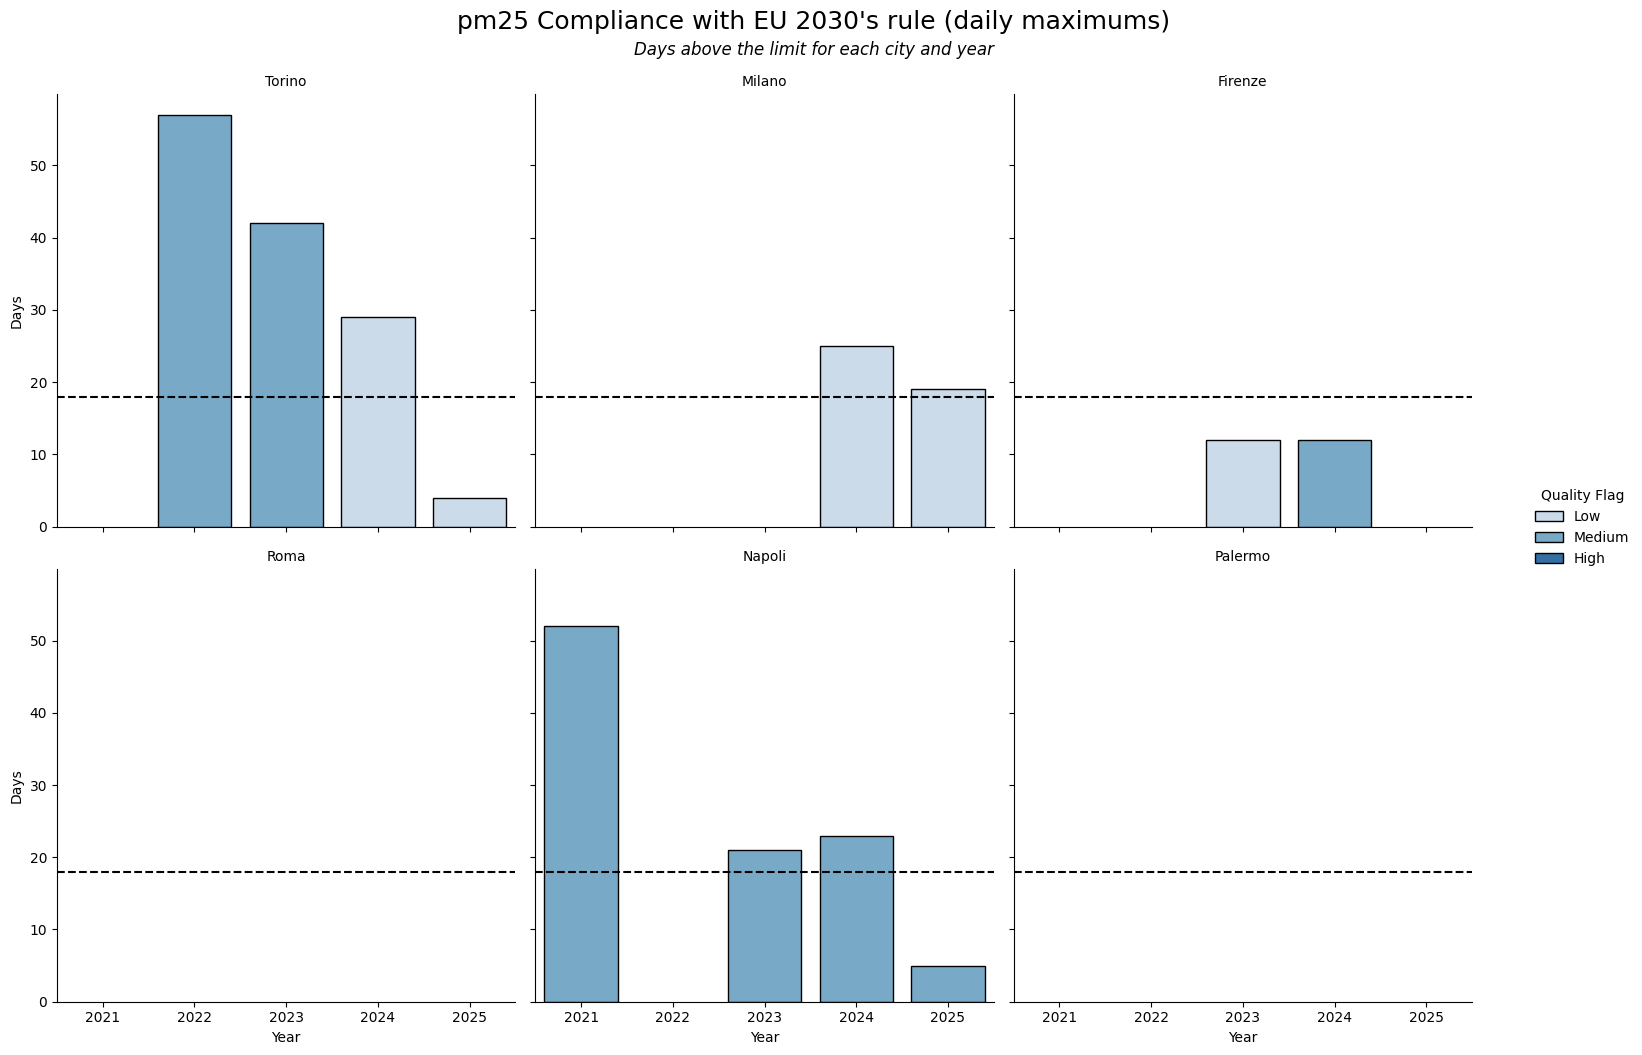

In [22]:
display(Image(filename="../results/plots/main/compliance_days_2030_pm25.png", width=800))

Furtther analysis and details can be found in:

`docs/methodology.md` → detailed methodology description
`notebooks/turin_deep_dive.ipynb` → quality assessments and aggregation robustness in detail for the city of Turin
`notebooks/Supplementary/retrival.ipynb` → sensors metadata and raw measurements overview
`notebooks/Supplementary/cleaning_and_quality.ipynb` → data cleaning and quality assessments overview
`notebooks/Supplementary/seasonal_trends_and_CAQI.ipynb` → further analysis about seasonal trends and general air quality
